# Qiskit Hybrid Job

## Bring your own qiskit container (BYOC)

Requirements
- We must have [aws cli](https://aws.amazon.com/es/cli/) installed and be logged in with our aws account. [how-to-login](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-quickstart.html)
- The user with whom we have logged in must have the ECR permissions polices. [Adding aws policies](https://docs.aws.amazon.com/IAM/latest/UserGuide/access_policies_manage-attach-detach.html)
- To build and upload our custom container, we must have [Docker](https://docs.docker.com/get-docker/) installed.


Export this in a terminal
```
export ACCOUNT_ID=<AWS_ID>
export REGION="us-west-2"
```

We must create an ECR repository and save the name in the ENV variable REPOSITORY_NAME
```
export REPOSITORY_NAME="amazon-braket-qiskit"
```

Login to ECR with aws cli in the terminal

```
aws ecr get-login-password --region $REGION | docker login --username AWS --password-stdin $ACCOUNT_ID.dkr.ecr.$REGION.amazonaws.com

```

We clone the braket-container [repo](https://github.com/aws/amazon-braket-containers)

In [5]:
!pip install -r amazon-braket-containers/src/requirements.txt

  Using cached wheel-0.33.4-py2.py3-none-any.whl (21 kB)
  Using cached docker-4.2.0-py2.py3-none-any.whl (143 kB)
  Using cached fabric-2.5.0-py2.py3-none-any.whl (51 kB)
  Using cached pyfiglet-0.8.post1-py2.py3-none-any.whl (865 kB)
  Using cached reprint-0.5.2-py2.py3-none-any.whl (5.9 kB)
  Using cached ruamel.yaml-0.16.7-py2.py3-none-any.whl (123 kB)
  Using cached boto3-1.17.97-py2.py3-none-any.whl (131 kB)
  Using cached black-19.10b0-py36-none-any.whl (97 kB)
  Using cached junit_xml-1.9-py2.py3-none-any.whl (7.1 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached websocket_client-1.3.2-py3-none-any.whl (54 kB)
  Using cached invoke-1.7.0-py3-none-any.whl (171 kB)
  Using cached paramiko-2.10.4-py2.py3-none-any.whl (212 kB)
  Using cached backports.shutil_get_terminal_size-1.0.0-py2.py3-none-any.whl (6.5 kB)
  Using cached botocore-1.20.112-py2.py3-none-any.whl (7.7 MB)
  Using cached s3transfer-0.4.2-py2.py3-none-any.whl (79 kB)
  Using cached jmesp

Building the image 

_Execute this in amazon-braket-containers root directory_

```
python src/main.py --framework qiskit
```



## Executing hybrid job

Then we need to create a python script to execute. In this example we are creating a simple bell state in a file called __algorithm_script.py__

In [14]:
!cat algorithm_script.py


from qiskit import QuantumCircuit
from qiskit_braket_provider import AWSBraketProvider

from braket.jobs import save_job_result



print("Test job started!!!!!")
#backend = BraketLocalBackend(name="default")
# Circuit 
provider = AWSBraketProvider()
backend = provider.get_backend("SV1")
q_c = QuantumCircuit(2)
q_c.h(0)
q_c.cx(0, 1)

resutls = backend.run(q_c, shots=1)

print(resutls.result().get_counts())
save_job_result(resutls.result().get_counts())

print("Test job completed!!!!!")

We need the Image URI from the amazon-braket-qiskit ECR repository we have created (Note we need the URI from the Image not the Repository URI).

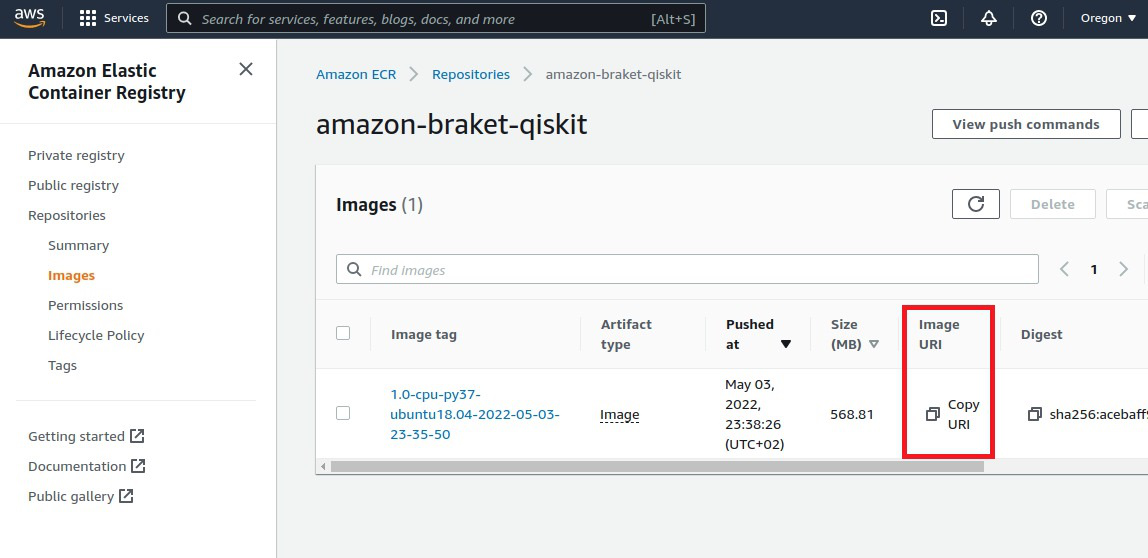

In [2]:
image_uri = <IMAGE_URI>

If you get `AttributeError: 'Braket' object has no attribute 'create_job'` just create a new env and  install [amazon braket sdk](https://github.com/aws/amazon-braket-sdk-python)

In [3]:
from braket.aws import AwsQuantumJob


job = AwsQuantumJob.create(
    device="arn:aws:braket:::device/quantum-simulator/amazon/sv1",
    source_module="algorithm_script.py",
    wait_until_complete=False,
    job_name="qiskit-job-0",
    image_uri=image_uri,
)

It might take some time

In [4]:
import time
print(job.arn)
while job.state() not in AwsQuantumJob.TERMINAL_STATES:
    print(job.state())
    time.sleep(20)

print(job.state())
print(job.result())


arn:aws:braket:us-west-2:309261531947:job/qiskit-job-0
QUEUED
QUEUED
QUEUED
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
RUNNING
COMPLETED
{'11': 533, '00': 491}
